# Summarization
- Summarize S-1 raw filings
- Extract keywords
- Batch process

In [65]:
#core
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

import glob
import nasdaq
import ml
from bs4 import BeautifulSoup
from pathlib import Path

#NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from gensim.summarization import summarize
from gensim.summarization import keywords

# Summarize IPO S-1 Filings

In [66]:
#load previous progress
df = pd.read_csv('2 sentiment analysis.csv', index_col='Symbol')

In [67]:
#batch process
lemmatizer = WordNetLemmatizer()
counter = 0

for x in df.index[:3]:
    #try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + str(x))

        #check if exists
        if Path("./Summary/" + x + ".txt").is_file() and Path("./Keywords/" + x + ".txt").is_file():
            print(x + ' data already exists, skipping...')
            continue

        #read S-1
        with open("./Data/" + x + ".htm", "r", encoding="utf-8") as f:
            html = f.read()
            soup = BeautifulSoup(html,"html5lib")
            text = soup.get_text(strip=True)
            
            #summarize & extract keywords
            summaty = summarize(text, ratio=0.01)
            words = keywords(text, ratio=0.01)
            
            #write summary
            with open("./Summary/" + x + ".txt", "w", encoding="utf-8") as f:
                f.write(summary)

            #write keywords
            with open("./Keywords/" + x + ".txt", "w", encoding="utf-8") as f:
                #lemmatize
                lemmatized_keywords = []

                for w in word_tokenize(words):
                    lemmatized_keywords.append(lemmatizer.lemmatize(w))

                lemmatized_keywords = list(set(lemmatized_keywords))
                
                #write
                for k in lemmatized_keywords:
                    f.write('%s\n' % k)                
    #except Exception as e:
    #    print(x, e)


( 1 / 696 ) AACC

( 2 / 696 ) AAT

( 3 / 696 ) ABR


KeyboardInterrupt: 

In [294]:
#save for later improvements
df.to_csv('2 sentiment analysis.csv', index=True, index_label='Symbol')

In [ ]:
#feature importance
ml.show_feature_importance(df, '3M')

In [300]:
#now run ML flow with sentiment features
run_ml_flow(df)

,1D,1W,1M,3M
AUC,0.531046,0.526413,0.496314,0.508410
f1,0.606061,0.610778,0.638298,0.677083
log loss,0.707982,0.740833,0.692042,0.667049


### Load Raw IPO

In [267]:
ipo = {}

for x in glob.glob("./Data/*.htm")[:5]:
    with open(x, "r", encoding="utf-8") as file:
        html = file.read()
        soup = BeautifulSoup(html,"html5lib")
        text = soup.get_text(strip=True)
        ipo[x.split('\\')[1].split('.')[0]] = text

In [268]:
ipo.keys()

dict_keys(['AAC', 'AACC', 'AACQU', 'AAHC', 'AAOI'])

# Summarization

In [2]:
import requests
import urllib.request

#response = urllib.request.urlopen('http://rare-technologies.com/the_matrix_synopsis.txt')
response = urllib.request.urlopen('https://www.sec.gov/Archives/edgar/data/1467623/000119312518055809/d451946ds1.htm')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)

In [17]:
#tokenize
tokens = [t for t in text.split()]
print('tokens', len(tokens))

tokens 106676


In [18]:
#remove stop words
sr = stopwords.words('english')
clean_tokens = []
 
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.append(token)        
print('clean tokens', len(clean_tokens))

clean tokens 65631


In [31]:
#lematization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []

for x in clean_tokens:
    lemmatized_tokens.append(lemmatizer.lemmatize(x))
        
print('lemmatized tokens', len(lemmatized_tokens))

lemmatized tokens 65631


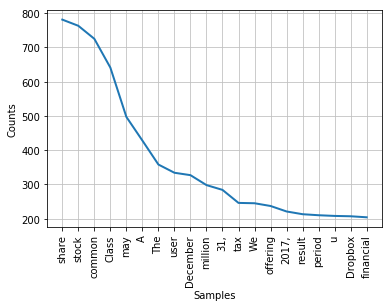

In [34]:
#count frequencies
freq = nltk.FreqDist(lemmatized_tokens)
freq.plot(20, cumulative=False)

In [36]:
summary = summarize(text, ratio=0.01)
keywords = keywords(text, ratio=0.01)
print('Summary:')
print(summary)

print('\nKeywords:')
print(keywords)

Summary:
These risks include, but are not limited to, the following:•Our business depends on our ability to retain and upgrade paying users, and any decline in renewals or upgrades could adversely affect our future results of operations.•Our future growth could be harmed if we fail to attract new users or convert registered users to paying users.•Our revenue growth rate has declined in recent periods and may continue to slow in the future.•We have a history of net losses, we anticipate increasing expenses in the future, and we may not be able to achieve or maintain profitability.•Our business could be damaged, and we could be subject to liability if there is any unauthorized access to our data or our users’ content, including through privacy and data security breaches.•Our business could be harmed by any significant disruption of service on our platform or loss of content.•We generate revenue from sales of subscriptions to our platform, and any decline in demand for our platform or for

In [46]:
lemmatizer = WordNetLemmatizer()
lemmatized_keywords = []

for x in word_tokenize(keywords):
    lemmatized_keywords.append(lemmatizer.lemmatize(x))
    
lemmatized_keywords = list(set(lemmatized_keywords))

In [47]:
print(len(keywords), len(lemmatized_keywords))

2899 250


In [48]:
keywords

'including\nincluded\ninclude\nincludes\nincludable\nshare\nshares\nshared\nsharing\ncompany\ncompanies\nusers\nuser\ntable\ntables\nstock\nstocks\nmarket\nmarketing\nmarkets\nmarketability\nbusiness\nbusinesses\nsecurities\nsecurity\nsecure\nsecuring\ncertain\ndropbox\ndropboxers\ntax\ntaxes\ntaxing\ntaxed\ngenerate\ngeneral\ngenerally\ngenerating\ngenerates\ngeneration\ngenerations\nfinancially\nfinancials\noffered\noffering\noffer\noffers\nofferings\nservice\nservices\nperiod\nperiods\nperiodic\nrelated\nrelating\nrelations\nrelate\nrelates\nrelation\nfinancial accounting\nprovided\nprovide\nprovides\nprovider\nproviders\nproviding\ninformation\ninform\ninformational\ninformed\nnew\nnews\naccount\naccounts\naccounted\naccountants\naccountability\ngenerated net\noperations\noperating\noperation\noperational\noperators\noperates\nbase\nbased\nbases\nadditional\naddition\nadditions\nplan\nplans\nplanning\nmanagement\nmanaging\nmanage\nmanaged\nmanager\nmanagers\nmanages\nsale\nsales\ne

In [49]:
lemmatized_keywords

['non',
 'purchaser',
 'actively',
 'liability',
 'compensation',
 'market',
 'useful',
 'including',
 'operates',
 'informational',
 'taxing',
 'increasing',
 'vesting',
 'currently',
 'company',
 'custom',
 'generated',
 'expensed',
 'capitalization',
 'effected',
 'taxed',
 'manager',
 'subscription',
 'pursuant',
 'rate',
 'transaction',
 'reported',
 'requiring',
 'news',
 'registrable',
 'financials',
 'customization',
 'manage',
 'stock',
 'informed',
 'requires',
 'timing',
 'expense',
 'develops',
 'operating',
 'asset',
 'transact',
 'productivity',
 'operator',
 'revenue',
 'compensate',
 'relate',
 'securing',
 'period',
 'current',
 'result',
 'future',
 'dated',
 'term',
 'effectively',
 'new',
 'effective',
 'financial',
 'technology',
 'lease',
 'stated',
 'information',
 'capitalizes',
 'file',
 'law',
 'officer',
 'purchase',
 'account',
 'generation',
 'trading',
 'provided',
 'requirement',
 'generates',
 'provide',
 'acting',
 'awarded',
 'includes',
 'marketing',


In [41]:
lemmatized_keywords

['p',
 'y',
 'c',
 'k',
 'x',
 'v',
 'r',
 'b',
 ' ',
 'u',
 'l',
 'a',
 'm',
 'd',
 'o',
 'e',
 'i',
 'z',
 'h',
 't',
 's',
 '\n',
 'q',
 'j',
 'f',
 'g',
 'n',
 'w']